
# Homework 5: Bootstrapping, Hypothesis Testing, and Regression
***

**Name**: Sahand Setareh

***

This assignment is due on Moodle by **11:59 PM on Friday 17 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 


In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

---

### [20 points] Problem 1 - Hypothesis Testing: Knowledge Check

You are working as a Data Scientist for an internet company. Your co-worker, Bob Dob, is a lovable scamp! Unfortunately, he also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Bob's hypothesis testing setup or conclusion is incorrect.

**Part A**: Bob has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  

Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Bob is particularly interested to see if the data suggests that more than 20% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$, where $\hat{p}$ is the sample proportion.

The null hypothesis should include a population parameter such as the mean or population proportion. This would be expressed as $H_0: p = 0.2$. It does not take the sample population proportion $\hat{p}$ here as it does not give us any information about the population. 

**Part B**: Bob decides instead to do his hypothesis test with a null hypothesis of $H_0: p > 0.2$.

A null hypothesis gives us a distribution that we compare against a set of data. This inequality does not give us a particular value to which we can employ and assess our distribution. 

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$, Bob computes a normalized test-statistic of $z = -1.5$ for the sample proportion and concludes that since $-1.5 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 15%.

Bob is incorrect. He compares the test statistic to the significance level, when he should compare the test statistic to the critical value. 

**Part D**: Bob is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. He computes a p-value of $0.06$, and thus concludes that there is only a 6% probability that the null hypothesis is true. 

Bob incorrectly determined the p-value (this is a right-tailed test), so it should be done as:

In [3]:
p = 1 - stats.norm.cdf(-1.5)
p

0.9331927987311419

In [2]:
t = stats.t.ppf(1 - 0.05/2, 148)
t

1.9761224936033632

In [3]:
f = stats.f.ppf(1 - 0.05, 2, 7)
f

4.73741412777588

---


### [30 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

Confidence Intervals to be computed: $\bar{x} \pm t_{\frac{\alpha}{2}, n - 1} \frac{s}{\sqrt{n}} $

In [3]:
def confidenceInterval(alpha, mean, s, size):
    ci = []
    ci.append(round(mean - stats.t.ppf(1 - 0.5 * alpha, size - 1) * s / np.sqrt(size), 3))
    ci.append(round(mean + stats.t.ppf(1 - 0.5 * alpha, size - 1) * s / np.sqrt(size), 3))
    return ci

print("Confidence Interval for Coffee + Nap: " + str(confidenceInterval(0.05, 451.3, 31.9, 10)))
print("Confidence Interval for Coffee: " + str(confidenceInterval(0.05, 494.2, 39.6, 10)))
print("Confidence Interval for Nap: " + str(confidenceInterval(0.05, 492.8, 45.2, 10)))

Confidence Interval for Coffee + Nap: [428.48, 474.12]
Confidence Interval for Coffee: [465.872, 522.528]
Confidence Interval for Nap: [460.466, 525.134]


Because the confidence intervals overlap, we can't say anything. We must instead test for the difference in means. We use a t-distribution because the the sample size is small enough

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

We will perform a hypothesis test for the difference between the means. Because the sample sizes are small, and the mean reaction times are normally distributed, we will employ a t-test here.

Test of Naps against Coffee, our hypotheses:

$$H_0 = \mu_{n} - \mu_c = 0$$
$$H_1 = \mu_{n} - \mu_c < 0$$

Test statistic (with $n_{n} + n_c - 2 = 18$ degrees of freedom) for the rejection region test: 

$$ T = \frac{(\bar{x}_{n} - \bar{x}_c)}{\sqrt{\frac{s^2_{n}}{n_{n}}{\frac{s^2_c}{n_c}}}}$$

Rejection Region: $ T < t_{0.05, 18} = -1.734 $

In [4]:
# Rejection Region 
region = stats.t.ppf(0.05, 18)
print(str(round(region, 3)))

# x-bar and s values for naps and coffee (exclusive)
mean_n, mean_c = 492.8, 494.2
s_n, s_c = 45.2, 39.6

# Sample size is 10 for both
n = 10

# Calculate T
T = (mean_n - mean_c)
T /= np.sqrt((s_n**2 + s_c**2) / n)

print("T = " + str(round(T, 3)))

-1.734
T = -0.074


For the rejection region: because $T = -0.074 > -1.734$, we cannot reject the null hypothesis. There is no conclusive evidence here that naps promote better reaction time than coffee. 

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

We will perform a hypothesis test for the difference between the means. Because the sample sizes are small, and the mean reaction times are normally distributed, we will employ a t-test here.

Test of Coffee + Naps against Coffee, our hypotheses:

$$H_0 = \mu_{cn} - \mu_c = 0$$
$$H_1 = \mu_{cn} - \mu_c < 0$$

Test statistic (with $n_{cn} + n_c - 2 = 18$ degrees of freedom) for the rejection region test: 

$$ T = \frac{(\bar{x}_{cn} - \bar{x}_c)}{\sqrt{\frac{s^2_{cn}}{n_{cn}}{\frac{s^2_c}{n_c}}}}$$

Rejection Region: $ T < t_{0.05, 18} = -1.734 $

In [5]:
# Rejection Region 
region = stats.t.ppf(0.05, 18)
print(str(round(region, 3)))

# x-bar and s values for coffee-naps and coffee alone
mean_cn, mean_c = 451.3, 494.2
s_cn, s_c = 31.9, 39.6

# Calculate T
T = (mean_cn - mean_c)
T /= np.sqrt((s_cn**2 + s_c**2) / n)

print("T = " + str(round(T, 3)))

-1.734
T = -2.668


Because $T = -2.668 < -1.734 $, we reject the null hypothesis. We can say that at the 95% confidence level there is evidence that taking a Coffee + Nap approach promotes better reaction time than just Coffee alone.

Repeating this process to compare Coffee + Naps vs Naps alone:

In [6]:
# Rejection Region 
region = stats.t.ppf(0.05, 18)
print(str(round(region, 3)))

# Calculate T
T = (mean_cn - mean_n)
T /= np.sqrt((s_cn**2 + s_n**2) / n)


print("T = " + str(round(T, 3)))

-1.734
T = -2.372


Because $T = -2.372 < -1.734 $, we reject the null hypothesis. We can say that at the 95% confidence level there is evidence that taking a Coffee + Nap approach promotes better reaction time than just a Nap alone.

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

The confidence interval for the standard deviation:

$$\sqrt{\frac{s^2(n-1)}{x^2_{\alpha, n - 1}}} \leq \sigma \leq \sqrt{\frac{s^2(n-1)}{x^2_{1 - \frac{\alpha}{2}, n - 1}}}$$

In [7]:
ci = []
ci.append(round(np.sqrt((n - 1) * s_cn**2 / stats.chi2.ppf(1 - 0.05 / 2, n - 1)), 3))
ci.append(round(np.sqrt((n - 1) * s_cn**2 / stats.chi2.ppf(0.05 / 2, n - 1)), 3))
print("95% Confidence Interval for standard deviation of reaction times for Cofee + Naps " + str(ci) + " milliseconds")

95% Confidence Interval for standard deviation of reaction times for Cofee + Naps [21.942, 58.237] milliseconds


<br>

---

### [50 points] Problem 3 - Simple Linear Regression for Science!

[Google Trends](https://trends.google.com/trends/?geo=US) is a free source of data about the interest in particular search terms. In this problem, we'll look at the interest in the search term "Influenza" and discover how interest in "Influenza" is changing over time. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `influenza_interest.csv` into a Pandas DataFrame. Create two new columns:

* `Year` should be the year associated with that data point, and
* `Month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "influenza" has evolved over time. Label the x-axis by year, displaying ticks for Janurary of each year between 2004 and 2021 (so that we can see all of the data and don't cut the year 2020 off at January 2020). You may find the Matplotlib DateFormatter object and the matplotlib dates module useful to correctly plot this data. You may use them if you wish to, but don't need to. They're imported below.

In [8]:
#STARTER CODE DO NOT CHANGE
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

,Month,Interest,Year,month
0,2004-01,19,2004,1
1,2004-02,19,2004,2
2,2004-03,14,2004,3
3,2004-04,11,2004,4
4,2004-05,9,2004,5
...,...,...,...,...
191,2019-12,29,2019,12
192,2020-01,54,2020,1
193,2020-02,71,2020,2
194,2020-03,100,2020,3


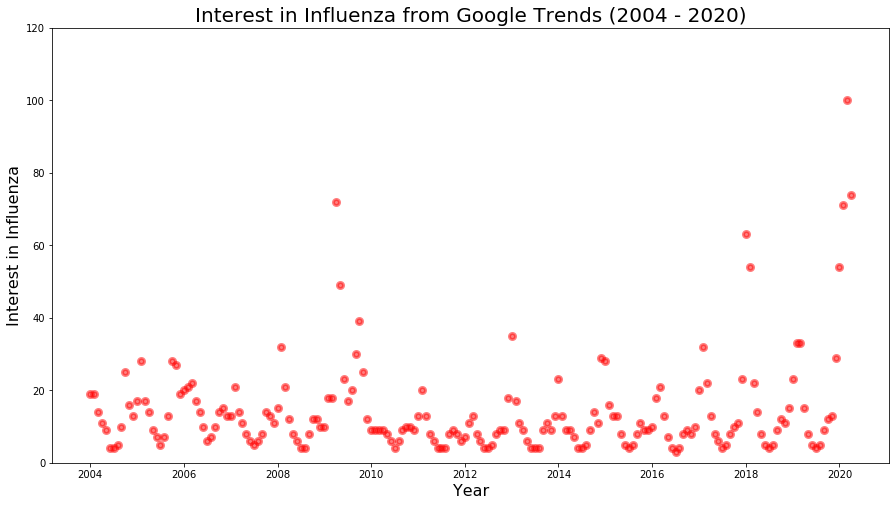

In [9]:
df = pd.read_csv("/Users/sahandsetareh/Spring 2020/CSCI 3022/Data/influenza_interest.csv")

year = []
month = []

for i in range(len(df)):
    year.append(int(df["Month"][i][:4]))
    month.append(int(df["Month"][i][-2:]))
    
df["Year"] = year
df["month"] = month
display(df)

index = df.index[(df["month"] == 1) & (df["Year"] % 2 == 0)]

# Scatter Plot
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 8))
plt.scatter(range(len(df["Month"])), df["Interest"], color = "red", alpha = 0.5, lw = 3)
ax.set_title("Interest in Influenza from Google Trends (2004 - 2020)", fontsize = 20)
ax.set_xlabel("Year", fontsize = 16)
ax.set_ylabel("Interest in Influenza", fontsize = 16)
ax.set_xticks(index)
ax.set_xticklabels(df.loc[index, "Year"])
ax.set_ylim([0, 120])

plt.show()

**Part B:** This data (and the sea-level data from Homework 4) are both **time series**, where the independent variable is *time* and the dependent quantity is interest in influenza (or sea level in the case of HW 4). One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in influenza, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of each year, and be sure to label your axes.

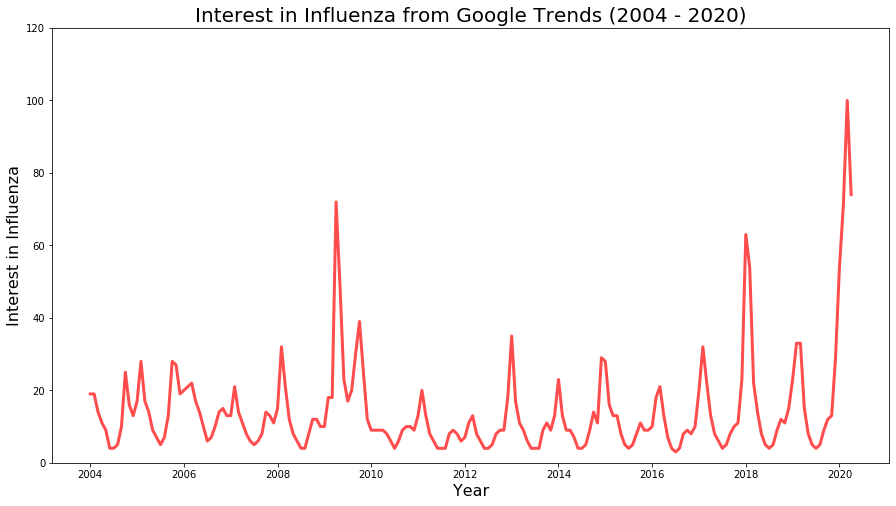

In [10]:
index = df.index[(df["month"] == 1) & (df["Year"] % 2 == 0)]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 8))
plt.plot(range(len(df["Month"])), df["Interest"], color = "red", alpha = 0.7, lw = 3)
ax.set_title("Interest in Influenza from Google Trends (2004 - 2020)", fontsize = 20)
ax.set_xlabel("Year", fontsize = 16)
ax.set_ylabel("Interest in Influenza", fontsize = 16)
ax.set_ylim([0,120])
ax.set_xticks(index)
ax.set_xticklabels(df.loc[index, "Year"])

plt.show()

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in influenza? During which months is interest in influenza highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in influenza for each month. So, compute 12 values and report them in a markdown table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists.

What do you think accounts for the increased interest in influenza during the fall and winter months?

Judging by our plots, it looks as though there exists an annual cycle related to the interest in influenza as it tends to rise in the annual autumns and winters (flu season), and we can see that the notable swine-flu epidemic in around 2009 resulted in a large increase in interest, which we can attribute to the severity and impact the flu had that year. If we decide to analyze the mean interest in influenza for each month, we can also see this trend:

In [11]:
month = df["month"].unique()

interest = []

for i in month:
    interest.append(df.loc[df["month"] == i,"Interest"].mean())

print("Mean interest in Influenza per month (2004 - 2020)")
print()

for i, k in zip(month, interest):
    print(str(round(i, 2)) + ": " + str(round(k, 2)))

Mean interest in Influenza per month (2004 - 2020)

1: 22.29
2: 25.47
3: 21.88
4: 18.94
5: 10.56
6: 6.44
7: 5.0
8: 6.06
9: 10.25
10: 14.94
11: 12.94
12: 14.94


**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in data science. Write a function (you'll want to use this code again later) that takes in the monthyl DataFrame, and returns a new DataFrame that consists only of two columns:

* `year`, and
* `interest`, the mean interest in data science from all of the months in that year.

Then call this function to convert the monthly data into yearly averages. Print the entire resulting datframe. 

**NOTE:** We have one year with incomplete data in our dataframe. Since 2020 isn't complete yet, we only have 3 months of data for this year. Here, we should compute the average of the three months we have. We'd recommend using a pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the year column to compute averages, but how you do this is up to you. If you do use a group by, you may find the .reset_index dataframe function useful to clean up the output. Don't hardcode the years, or do anything that relies on a year being twelve months. It will make your life harder later in this problem.

In [12]:
df = df[['Year', 'Interest']].copy()
avg = df.groupby('Year', as_index = False)['Interest'].mean()
avg

,Year,Interest
0,2004,12.416667
1,2005,15.916667
2,2006,14.083333
3,2007,10.833333
4,2008,12.000000
5,2009,27.750000
6,2010,8.166667
7,2011,8.583333
8,2012,8.500000
9,2013,11.000000


**Part E:** Write a function to fit a a simple linear regression model with `year` as the feature and `interest` as the response (mean annual interest in influenza). You'll need to use this function later. This function should take in a dataframe and return a fitted model. Use the "statsmodels" package (imported below as "sm") to generate the model using their convenient [Ordinary Least Squares model](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html). Here, you'll want to add a constant term to the feature, so that the statsmodel package can fit the regression model with a non-zero Y intercept. There's a helpful function in the statsmodels package to add a constant term, or you can write code to add the constant yourself, if you wish.

Call the function you wrote to get the regression model of our yearly average interest, then print the parameters of the regression line in the form $Y = \alpha + \beta x$. 

Then make a scatter plot of the mean annual interest in influenza as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

In [13]:
#STARTER CODE DO NOT CHANGE
import statsmodels.api as sm

Y = -2377.916 + 1.19X


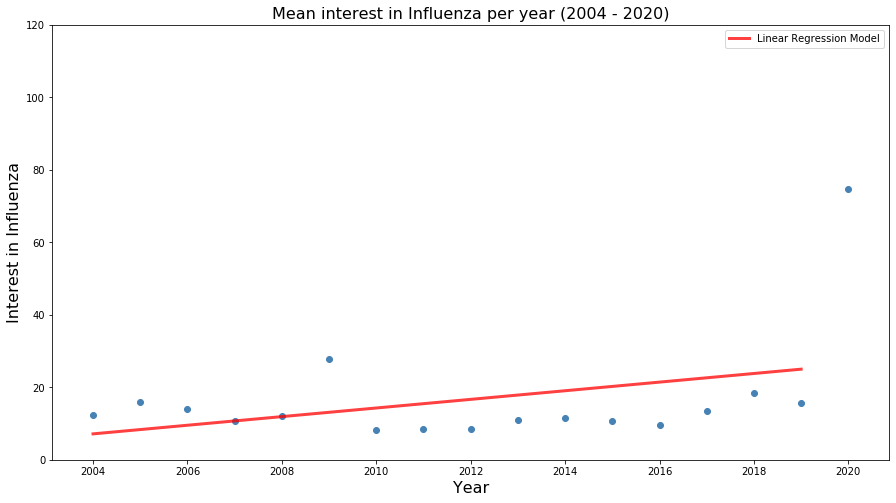

In [14]:
# Use linregress to obtain values for beta, alpha, r-value, p-value, and std error
beta, alpha, r, p, stderr = stats.linregress(avg["Year"], avg["Interest"])
print("Y = " + str(round(alpha, 3)) + " + " + str(round(beta, 3)) + "X")

# Plotting
years = np.arange(2004, 2020, 1)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8))
plt.plot(years, alpha + beta * years, color = "red", alpha = 0.75, lw = 3, label = 'Linear Regression Model')
plt.legend()
plt.scatter(avg.Year, avg.Interest, color = 'steelblue')
ax.set_title("Mean interest in Influenza per year (2004 - 2020)", fontsize = 16)
ax.set_xlabel("Year", fontsize = 16)
ax.set_ylabel("Interest in Influenza", fontsize = 16)
ax.set_ylim([0,120])

plt.show()

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in influenza is positive or negative. Fully justify your responses.

The value of the coefficient $\hat{\beta}$ is the estimate in the change in the interest in influenze every year. This value is positive as we observe that $ \hat{\beta} = 1.19$, which is in line with the rate of change in the regression line which we observe is clearly positive and increasing over time. 

**Part G**: What interest in influenza does your simple linear regression model predict in the year 2050? What about in 2150? How about 1900? Feel free to use the statsmodels .predict() method here. What are potential drawbacks to this model for interest in influenza (think about the minimium and maximum values for the data)? 

**Note**: From Google Trends Documentation, the "interest" variable is defined as: "Interest represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

In [15]:
y = round(alpha + beta * 2050, 3)
print("y(2050) = " + str(y))

y = round(alpha + beta * 2150, 3)
print("y(2150) = " + str(y))

y = round(alpha + beta * 1900, 3)
print("y(1900) = " + str(y))

y(2050) = 61.902
y(2150) = 180.918
y(1900) = -116.621


The reason this model doesn't make sense is that as time goes on, interest in the flu becomes astronomically high which is unrealistic given it's cyclilic behavior, whereas in 1900 the model predicts a negative value which also doesn't make any sense in the context of the interest of influenza at any given time should always be greater than or equal to zero. 

**Part H:** Write a function that computes an 90% confidence interval for the slope parameter, $\beta$. You'll need to use this function again later. This function should take in the dataframe of yearly data and a statsmodel linear regression model, and print both the 90% confidence interval for beta and the value of $\hat{\beta}$. You should be performing all calculations yourself in Python. 

**RULES: There is a statsmodels function that computes the confidence interval. Do not use it, write python code yourself to calculate the CI. You may use the statsmodels confidence interval function to check your work if your like. You also may use the statsmodel .predict() method to get predicted values, and the .params attribute to get the slope parameter. Write your own code to calculate the sum of square errors. You may use numpy functions (min, max, mean, var, etc...) and stats functions (ppf/cdf/etc...) where appropriate.**

Call the function to calculate the 90% CI for beta with this model.

90% Confidence Interval for $\beta$:  $$\hat{\beta} \pm \space t_{\frac{\alpha}{2}, n - 2}SE(\hat{\beta})$$

$$SE(\hat{\beta}) = \frac{\hat{\sigma}}{\sqrt{\sum(x_i - \bar{x})}}$$

$$\hat{\sigma} = \sqrt{\frac{SSE}{n - 2}}$$

In [16]:
def confidenceInterval(beta, sse, sum_x, sigma):
    ci = []
    t = stats.t.ppf(1 - 0.10 / 2, df = len(avg) - 2)
    
    ci.append(round(beta - t * sigma / np.sqrt(sum_x), 3))
    ci.append(round(beta + t * sigma / np.sqrt(sum_x), 3))
    
    return ci

sum_x = np.sum((avg["Year"] - avg["Year"].mean())**2)
sse = np.sum((avg["Interest"] - (alpha + beta * avg["Year"]))**2)
sigma = np.sqrt(sse / len(avg))

print("90% Confidence Interval for Beta with this model: " + str(confidenceInterval(beta, sse, sum_x, sigma)))

90% Confidence Interval for Beta with this model: [-0.031, 2.411]


**Part I:** What proportion of the variation in mean annual interest in influenza is explained by your linear regression model? Note: It's fine to use the model .summary method here. You do not need to calculate this by hand.

The $R^2$ value is the proportion of the variation in mean annual interrest in influenza per the regression model, we determined this earlier via the linregress function (please see part E).

In [17]:
r**2

0.14664344569715426

**Part J:** Ouch, so that model doesn't really explain very much of the variance in the data! Maybe we have some outliers in our data. Use your original monthly dataframe and drop any rows that have an interest value greater than or equal to the 97th percentile of our data. Print the number of rows remaining.

In [18]:
newdf = df[df["Interest"] < df["Interest"].quantile(q = 0.97)]
print("Number of rows remaining: " + str(len(newdf)))

Number of rows remaining: 189


**Part K:** In this problem, you'll use the functions you wrote in parts **D**, **E**, and **H** to process your new outlier free data, then fit a regression model and calculate the confidence interval on the slope parameter of the new model. First, use your function from part **D** to get the yearly averages. Second, use the function from part **E** to fit a linear regression model to the yearly averages. Finally, use the function you wrote in **H** to print the 90% confidence interval of the slope and the estimated slope.

Y = 308.015 + -0.147X


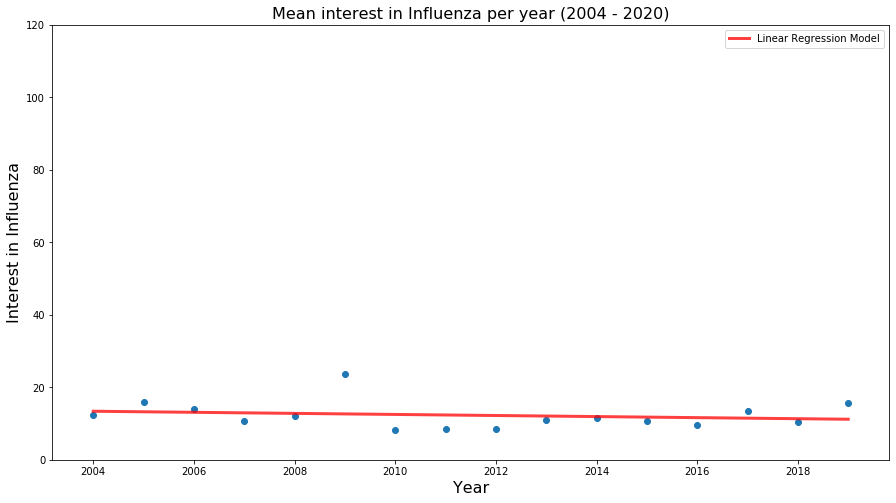

Beta value: -0.147
90% Confidence Interval of the slope (beta): [-0.498, 0.204]


In [19]:
# Annual averages for outlier-free data
new_avg = newdf.groupby('Year', as_index = False)['Interest'].mean() 

# Use linregress to obtain values for beta, alpha, r-value, p-value, and std error
beta, alpha, r, p, stderr = stats.linregress(new_avg["Year"], new_avg["Interest"])

print("Y = " + str(round(alpha, 3)) + " + " + str(round(beta, 3)) + "X")

# Plotting 
years = np.arange(2004, 2020, 1)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8))
plt.plot(years, alpha + beta * years, color = "red", alpha = 0.75, lw = 3, label = 'Linear Regression Model')
plt.legend()
plt.scatter(new_avg.Year, new_avg.Interest)
ax.set_title("Mean interest in Influenza per year (2004 - 2020)", fontsize = 16)
ax.set_xlabel("Year", fontsize = 16)
ax.set_ylabel("Interest in Influenza", fontsize=16)
ax.set_ylim([0, 120])

plt.show()

def confidenceInterval(beta, sse, sum_x, sigma):
    ci = []
    t = stats.t.ppf(1 - 0.10 / 2, df = len(new_avg) - 2)
    
    ci.append(round(beta - t * sigma / np.sqrt(sum_x), 3))
    ci.append(round(beta + t * sigma / np.sqrt(sum_x), 3))
    
    return ci

sum_x = np.sum((new_avg["Year"] - new_avg["Year"].mean())**2)
sse = np.sum((new_avg["Interest"] - (alpha + beta * new_avg["Year"]))**2)
sigma = np.sqrt(sse / len(new_avg))

print("Beta value: " + str(round(beta, 3)))
print("90% Confidence Interval of the slope (beta): " + str(confidenceInterval(beta, sse, sum_x, sigma)))

**Part L:** Our estimate for beta, the slope parameter in part **K** should have come out to be slightly negative, and also should have had a confidence interval that included zero (check your work if it didn't). What does this tell us about our data? Does it seem like interest in Influenza is increasing or decreasing over time? Or is the interest in Influenza more affected by yearly trends and high peaks in intrest during especially bad years for flu (or flu like diseases)?

This tells us that the interest in influenza is more affected by yearly trends and high peaks in interest during more impactful flu years (around 2009, also more recently in 2020). This is in line with interest being tied to the seasons, and unfortunately more catastrphic strains of the annual flu result in much higher levels of interest than what would be generally expect year-to-year. 